# Hola! bienvenido modelo de clasificación no supervisado de nuestro grupo 14

### Aquí vas a encontrar la documentacióon de comó se realizó un modelo de clasificación no supervisado para determinar las ramas del Data Scientyst:

Primero importamos las librerias a utilizar, tanto para crear el modelo, limpiar los datasets, guardar el modelo y graficar el mismo para tener una perspectiva visual

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from pypdf import PdfReader
from sklearn.cluster import KMeans

#### 1) Estructura del modelo

Creando el modelo de clasificación sin supervisión

Un Data Scientyst se caracteriza por conocer y trabajar con diferentes herramientas, las cuales serán necesarias para luego clasificar la rama a cual seguir. En esta ocasión vamos a nombrar las herramientas más utilizadas:

In [28]:
herramientas = ['python','excel','tableau','jupyter','matplotlib','machine learning','engineer','engineering''tensorflow',
 'jupyter notebook','apache''power bi','sql','postgresql','mongodb','airflow','big query','hive','ingeniero software','science',
 'scientists','scientific','scientist','analytics','analysis','analyst','datos','data','cloud','frameworks','numpy','pandas',
 'etl','big data','hadoop','pipeline','dashboards', 'visualization', 'storytelling','deep learning','aws','azure']

Se transforma en un Dataframe para utilizarla después:

In [29]:
df_herramientas = pd.DataFrame(columns=herramientas)

In [30]:
df_herramientas

,python,excel,tableau,jupyter,matplotlib,machine learning,engineer,engineeringtensorflow,jupyter notebook,apachepower bi,...,etl,big data,hadoop,pipeline,dashboards,visualization,storytelling,deep learning,aws,azure


#### 2) Agregando datos a entrenar

El conntenido del set de entrenamiento está conformado por la demanda de tecnologías que se requieren en cada puesto. Dicho esto, se realizó un trabajo de Web Scraping para tomar información de las tecnologías demandadas en America Latina = "Datos.csv"

In [31]:
df = pd.read_csv("Datos.csv")

limpiando los valores nulos

In [32]:
df = df[["DescripcionTrabajo","PuestoTrabajo"]]
df = df.dropna()

vamos el contenido de la descripción del trabajo

In [33]:
df.DescripcionTrabajo[2].lower().replace("\n"," ").replace(":"," ").replace("/"," ")

' en baufest queremos mejorar la vida con tecnología, por lo que nos encontramos en la búsqueda de un data analyst para sumar a nuestro equipo con ganas de aprender las mejores prácticas y desempeñarse en un importante proyecto.responsabilidades • análisis y solución de incidentes.• análisis de procesos mediante consultas sql.• soporte a aplicaciones.• propuestas de mejoras a procesos y aplicaciones.requisitos principales • poseer al menos 1 año desarrollando con herramientas de etl y o de reporting.• experiencia en desarrollo de sentencias sql.• capacidad analítica.• capacidad de interactuar con usuarios finales.• experiencia en oracle.requisitos deseables • conocimiento en metodologías agiles.te ofrecemos • bau compensations  pago parcial de tu sueldo en dólares. ajustes trimestrales. evaluación anual de desempeño y revisión de categorización.• bau lunch  recibirás un cupón de pedidos ya cada viernes del mes.• bau internet  reintegro mensual parcial de tu factura.• bau anti-traffic  

Desde aquí vamos a realizar una comparación, la descripción del puesto con la lista de herramientas que usamos al comienzo. Para cada descripción, se agregará una fila, la misma solo tendrá valores "1" si encontró la cohincidencia o "0" en caso de no encontrarla.

In [34]:
indice = 0
for descrip in df.DescripcionTrabajo:
    fila = []
    for i in herramientas:
        if i in descrip.lower().replace("\n"," ").replace(":"," ").replace("/"," "):
            fila.append(1)
        else: fila.append(0)
    df_herramientas.loc[indice] = fila
    indice+=1

El set de datos listo para entrenar quedaría así:

In [35]:
df_herramientas

,python,excel,tableau,jupyter,matplotlib,machine learning,engineer,engineeringtensorflow,jupyter notebook,apachepower bi,...,etl,big data,hadoop,pipeline,dashboards,visualization,storytelling,deep learning,aws,azure
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,1,1,0,0,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,1,0
8838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8839,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3) Entrenar el modelo

Hay diferentes modelos de clasificación no supervisada pero para nuestro objetivo, necesitamos agrupar de manera eficiente las tecnologías. Para esto, se eligió K-Means. Kmeans es uno de los algoritmos de agrupamiento más populares que divide los datos en k grupos basados en la similitud de sus características.

agregamos nuestro objeto KMEANS

In [36]:
kmeans = KMeans(n_clusters=3, random_state=11)

ponemos a entrenar con el set de datos:

In [37]:
kmeans.fit(df_herramientas.values)

KMeans(n_clusters=3, random_state=11)

Entreno! Ahora los datos quedan guardaos entre 0 1 y 2. Con la funcion Labels_ podemos ver los resultados

In [38]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 0])

Para resumir... El modelo ya entreno y clasifico. Ahora en el array se encuetran los valores " 0 - 1 - 2 ", estos son los resultados de la clasificación pero necesitamos averiguar que son estos valores:

#### 4) Cambio de variables

Para determinarlo, sabemos que no todas las ofertas laborales están equivocadas, por esto, es que vamos a comparar con los valores principales así saber si tienen relación entre ellas.

csv original:

In [39]:
df = pd.read_csv("Datos.csv")
df = df[["DescripcionTrabajo","PuestoTrabajo"]]
df = df.dropna()
df["kmeans"] = kmeans.labels_

orden y cantidad de "Puestos de Trabajo"

In [40]:
df.PuestoTrabajo.value_counts()

data analyst      3631
data engineer     2756
data scientist    2455
Name: PuestoTrabajo, dtype: int64

orden y cantidad de "kmeans"

In [41]:
df.kmeans.value_counts()

1    3467
0    2882
2    2493
Name: kmeans, dtype: int64

Tal como vemos, los valores son muy aproximados, por esto se tomarán como valores para data analyst = 1, data engineer = 0 y data science = 2 

#### 5) Graficar el modelo con TSNE y Seaborn

Aquí para realizar una visualización de los datos, podemos acudir a TSNE (t-Distributed Stochastic Neighbor Embedding) es una técnica de visualización de datos que permite reducir la dimensionalidad de los datos(en nuestro caso el DataFrame completo) y representarlos en un espacio de dos o tres dimensiones para su visualización.

creamos el objeto

In [42]:
tsne = TSNE(n_components=2, random_state=1)

entrenamos con el set de datos de df_herramientas

In [43]:
tsne = tsne.fit_transform(df_herramientas)

C:\Users\lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [44]:
tsne.shape

(8842, 2)

Y listo! ya tenemos todas las filas en dos dimensiones para graficar

Por ultimo, vamos a agregar los valores de Kmeans.labels_ para utilizarlos dentro del "Hue" así pueda identificar los valores dados

In [45]:
tsne = pd.DataFrame(data= tsne ,columns=["componente1","componente2"])
tsne["kmeans"] = kmeans.labels_

Así es como quedó

In [46]:
tsne

,componente1,componente2,kmeans
0,17.086187,25.575987,1
1,-7.381012,19.311441,1
2,-0.623913,29.549370,1
3,19.165710,13.161137,1
4,-4.916607,56.574741,1
...,...,...,...
8837,-64.009315,10.486632,2
8838,61.522633,-5.593421,1
8839,-47.603405,-53.906738,0
8840,32.091785,72.622589,1


Ahora con el cambio de variables aplicado

In [47]:
tsne.kmeans = tsne.kmeans.replace(0,"Data Engineer").replace(1,"Data Analyst").replace(2,"Data Science")
tsne

,componente1,componente2,kmeans
0,17.086187,25.575987,Data Analyst
1,-7.381012,19.311441,Data Analyst
2,-0.623913,29.549370,Data Analyst
3,19.165710,13.161137,Data Analyst
4,-4.916607,56.574741,Data Analyst
...,...,...,...
8837,-64.009315,10.486632,Data Science
8838,61.522633,-5.593421,Data Analyst
8839,-47.603405,-53.906738,Data Engineer
8840,32.091785,72.622589,Data Analyst


La grafica se realiza con la librería Seaborn

<AxesSubplot: xlabel='componente1', ylabel='componente2'>

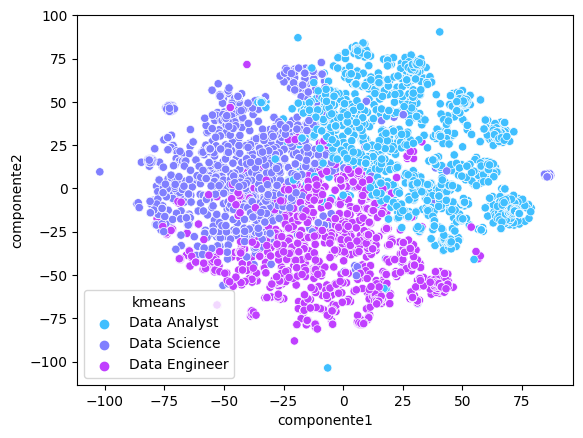

In [48]:
sns.scatterplot(x='componente1', y='componente2', data = tsne ,hue="kmeans", palette="cool")

#### 6) Exportar el modelo

El modelo funcionó correctamente, solo queda guardarlo para utilizarlo luego

In [49]:
pkl_data_entrenado = "clasificacion_areas_del_data.pkl"
with open(pkl_data_entrenado, 'wb') as file:
    pickle.dump(kmeans,file)

#### 7) Funciones para utilizar en la Web, agregando un archivo PDF o CSV

El modelo funciona para recibir PDF que pueden ser curriculums o un set de datos en formato CSV

cuando ingresa un pdf:

In [50]:
def arhivo_pdf(archivo):
    pdf = PdfReader(archivo)                # lee pdf
    numeropaginas = len(pdf.pages)          # cuenta las paginas

    text = ''
    for i in range(numeropaginas):          # utiliza un bucle para guardar todo el texto del PDF
        pagina = pdf.pages[i] 
        text = text + pagina.extract_text() 
    text = text.lower().replace("\n"," ").replace(":"," ").replace("\xa0"," ")


    fila = []                   # una vez con el texto completo, buscamos las herramientas en el documento y guardamos en "fila"
    for i in herramientas:
        if i in text:
            fila.append(1)      # 1 de haberlo encontrado
        else: fila.append(0)    # 0 en caso de que no lo encuentre


    text = np.asarray(fila).reshape(1,-1)       # transformamos para evaluar kmeans
    preds=kmeans.predict(text)                  # consultamos el valor
    if preds[0] == 0: preds = "Data Engineer"   # dependiendo el valor se asignará su respuesta
    if preds[0] == 1: preds = "Data Analyst"
    if preds[0] == 2: preds = "Data Science"

    return preds    #resultado

cuando se ingresa un csv:

In [51]:
def importar_csv(csv):
    df = pd.read_csv(csv)       # leemos el csv
    descripcion = df.columns[0] # indicamos la columna a usar
    df = df[[descripcion]]      
    df = df.head().dropna()     # eliminamos nulos
    df["kmeans"] = ""           # creamos una columna para agregar los valores luego
    df              # df limpio

    indice = 0
    for descrip in df[descripcion]:     # en este bucle buscamos entre cada fila las cohincidencias
        fila = []                       # guardamos en fila
        for i in herramientas:
            if i in descrip.lower():fila.append(1)  # 1 si encontró el valor
            else: fila.append(0)                    # 0 no lo encontró

        fila= np.asarray(fila).reshape(1,-1)    # transformar la fila para evaluar
        preds=kmeans.predict(fila)              # kmeans evalúa el resultado


        if preds[0] == 0: preds = "Data Engineer"   #indica el resultado dependiendo el valor
        if preds[0] == 1: preds = "Data Analyst"
        if preds[0] == 2: preds = "Data Science"
        
        df["kmeans"].loc[indice] = preds[0]     #lo guarda en el DataFrame con su respectiva fila
        indice+=1

    return df   #muestra el DataFrame terminado